# BUSINESS QUESTIONS

1. What is the number of properties per year of construction?

2. What is the smallest number of rooms per building construction number?

3. What is the highest purchase price for each room number?

4. What is the sum of all purchase prices by number of rooms?

5. What is the sum of all purchase prices by number of bedrooms and bathrooms?

6. What is the average room size of the buildings per year of construction?

7. What is the median room size of the buildings per year of construction?

8. What is the standard deviation of the room size of the property per year of construction?

9. How is the average growth in the purchase price of real estate, per year, per day and per week of the year

10. Look at the map and be able to identify the houses with the highest price


11. Create a new column called 'dormitory_type'

    * if the value of the column 'berdrooms' is equal to 1 -> studio
    * if the value of the column 'berdrooms' is equal to 2 -> apartment
    * if the value of the column 'berdrooms' > 2 -> house
    

12. Make a bar graph that represents the sum of the prices by the number of rooms

13. Draw a line graph that represents the average prices for the year of construction of the properties.

14. Make a bar graph that represents the average price by type of dorms.

15. Draw a line graph showing the evolution of the average prices for the year of renovation of the buildings, from the year 1930

16. Make a table showing the average prices by year of construction and type of bedroom for the properties

17. Create a Dashboard with the graphs of questions 12,13,14 (1 row and 2 columns)

18. Create a Dashboard with the graphs of questions 12 and 14 (2 columns)

# IMPORTS 

In [45]:
import pandas as pd
import seaborn as sns
import plotly.express as px

from IPython.core.display  import HTML
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Helper Function

In [47]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# LOADING DATA

In [2]:
data = pd.read_csv('datasets/kc_house_data.csv')

# ANSWERING BUSINESS QUESTIONS

## What is the number of properties per year of construction?

In [7]:
data[['id', 'yr_built']].groupby('yr_built').count().reset_index().rename(columns={'id':'num_houses'}).sort_values('num_houses', ascending=False).head()

yr_built  num_houses
114      2014         559
106      2006         454
105      2005         450
104      2004         433
103      2003         422

## What is the smallest number of rooms per building construction number?

In [12]:
data[['bedrooms', 'yr_built']].groupby('yr_built').min().reset_index().rename(columns={'bedrooms':'num_bedrooms'}).sort_values('num_bedrooms', ascending=False)

yr_built  num_bedrooms
94       1994             2
95       1995             2
93       1993             2
92       1992             2
51       1951             2
..        ...           ...
106      2006             0
13       1913             0
103      2003             0
96       1996             0
85       1985             0

[116 rows x 2 columns]

## What is the highest purchase price for each room number?

In [13]:
data[['price', 'bedrooms']].groupby('bedrooms').max().reset_index()

bedrooms      price
0          0  1295650.0
1          1  1247000.0
2          2  3278000.0
3          3  3800000.0
4          4  4489000.0
5          5  7062500.0
6          6  7700000.0
7          7  3200000.0
8          8  3300000.0
9          9  1400000.0
10        10  1148000.0
11        11   520000.0
12        33   640000.0

## What is the sum of all purchase prices by number of rooms?

In [14]:
data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

bedrooms         price
0          0  5.323550e+06
1          1  6.321093e+07
2          2  1.107789e+09
3          3  4.580264e+09
4          4  4.372957e+09
5          5  1.259346e+09
6          6  2.245416e+08
7          7  3.614502e+07
8          8  1.436600e+07
9          9  5.363999e+06
10        10  2.458000e+06
11        11  5.200000e+05
12        33  6.400000e+05

## What is the sum of all purchase prices by number of bedrooms and bathrooms?

In [33]:
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

## What is the average room size of the buildings per year of construction?

In [34]:
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

sqft_living
yr_built             
1900          1732.01
1901          1763.62
1902          1919.63
1903          1507.74
1904          1603.18
...               ...
2011          2313.68
2012          2378.74
2013          2636.59
2014          2615.39
2015          2596.32

[116 rows x 1 columns]

## What is the median room size of the buildings per year of construction?

In [35]:
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

sqft_living
yr_built             
1900          1540.00
1901          1610.00
1902          1600.00
1903          1505.00
1904          1280.00
...               ...
2011          2270.00
2012          2237.50
2013          2580.00
2014          2650.00
2015          2590.00

[116 rows x 1 columns]

## What is the standard deviation of the room size of the property per year of construction?

In [18]:
data[['sqft_living', 'yr_built']].groupby('yr_built').std().reset_index()

yr_built  sqft_living
0        1900   732.944373
1        1901   668.231804
2        1902   878.659300
3        1903   469.723438
4        1904  1076.870620
..        ...          ...
111      2011   804.863521
112      2012   771.430350
113      2013   883.499390
114      2014   893.810049
115      2015  1155.605425

[116 rows x 2 columns]

## How is the average growth in the purchase price of real estate, per year, per day and per week of the year

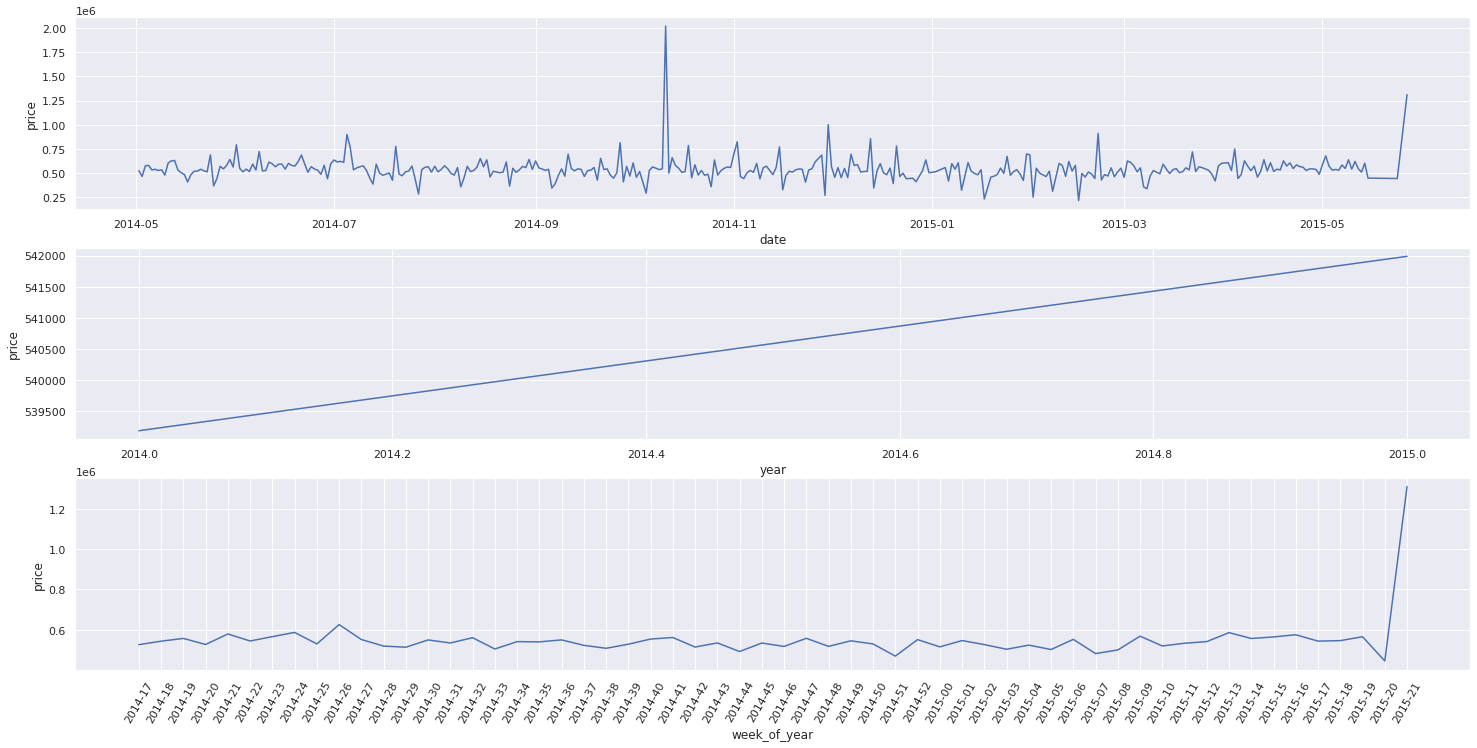

In [75]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['week_of_year'] = data['date'].dt.strftime('%Y-%W')

aux = data[['price', 'date']].groupby('date').mean().reset_index()
plt.subplot(3,1,1)
sns.lineplot(x='date', y='price', data=aux);

aux1 = data[['price', 'year']].groupby('year').mean().reset_index()
plt.subplot(3,1,2)
sns.lineplot(x='year', y='price', data=aux1);

aux2 = data[['price', 'week_of_year']].groupby('week_of_year').mean().reset_index()
plt.subplot(3,1,3)
sns.lineplot(x='week_of_year', y='price', data=aux2);
plt.xticks(rotation=60);

## Look at the map and be able to identify the houses with the highest price

In [31]:
df = data[['id', 'price', 'lat', 'long']]
mapa = px.scatter_mapbox(df, lat="lat", lon="long", hover_name='id', hover_data=['price'], size='price', size_max=15, zoom=10)

mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0})

mapa.show()

## Create a new column called 'dormitory_type'

In [76]:
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house')

## Make a bar graph that represents the mean of the prices by the number of rooms

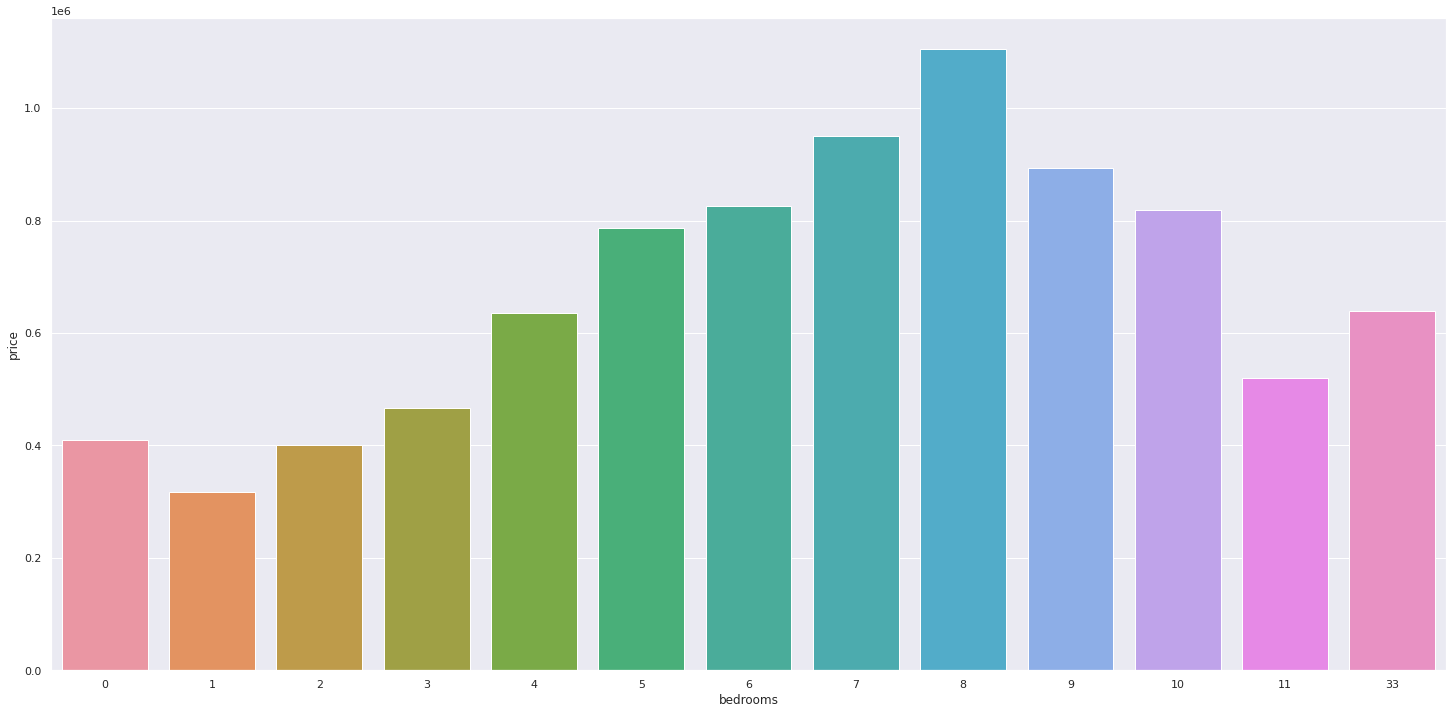

In [82]:
aux = data[['price', 'bedrooms']].groupby( 'bedrooms' ).mean().reset_index()
sns.barplot(x='bedrooms', y='price', data=aux);

## Make a line graph that represents the average prices for the year of construction of the properties.

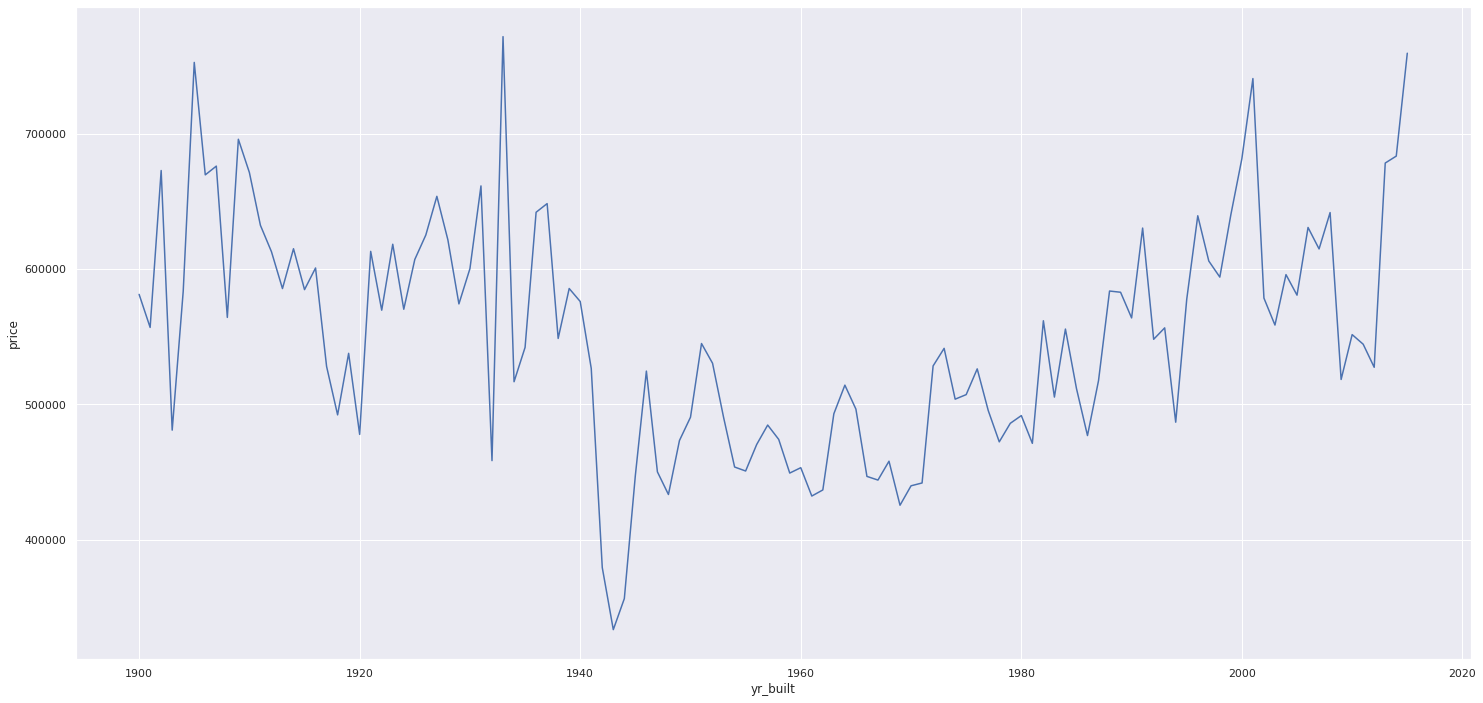

In [83]:
aux = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
sns.lineplot(x='yr_built', y='price', data=aux);

## Make a bar graph that represents the average price by type of dorms.

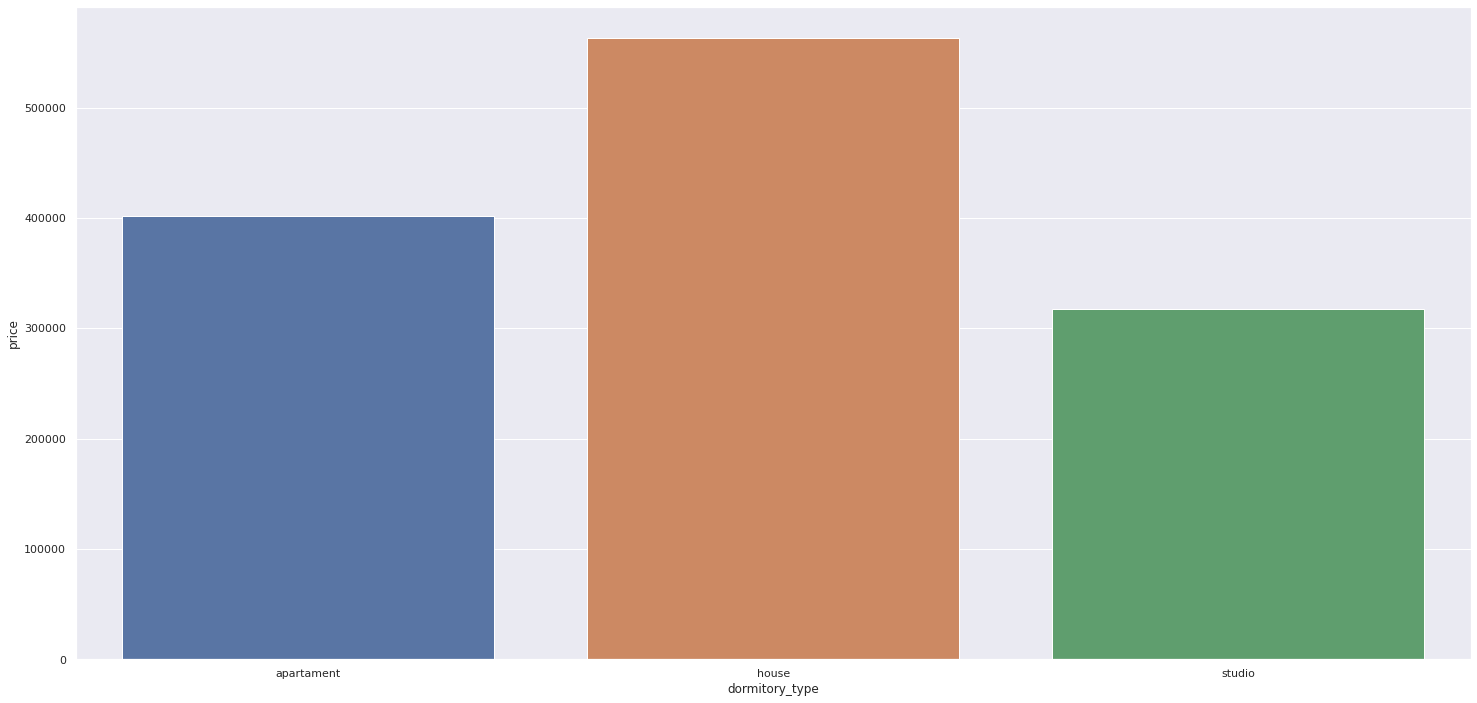

In [84]:
aux = data[['dormitory_type', 'price']].groupby('dormitory_type').mean().reset_index()
sns.barplot(x='dormitory_type', y='price', data=aux);

## Draw a line graph that shows the evolution of the average prices for the year of renovation of the buildings, starting in the year 1930

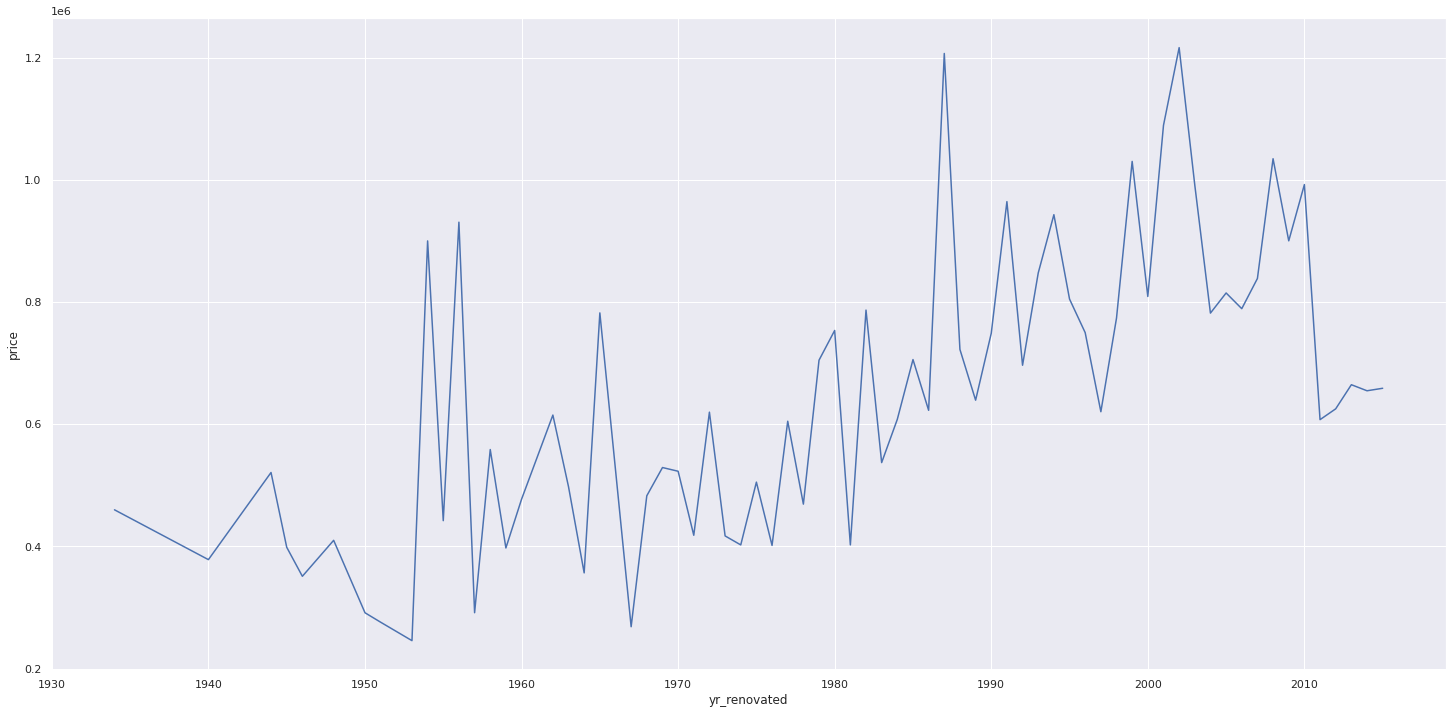

In [88]:
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: pd.to_datetime('1900-01-01') if x == 0 else pd.to_datetime(x, format='%Y'))

aux = data[['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()
aux = aux[aux['yr_renovated'] > '1930-01-01']
sns.lineplot(x='yr_renovated', y='price', data=aux);

## Make a table showing the average prices by year of construction and type of bedroom for the properties

In [94]:
data[['yr_built', 'dormitory_type', 'price']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

yr_built dormitory_type     price
0        1900     apartament 589533.33
1        1900          house 584854.27
2        1900         studio 398944.00
3        1901     apartament 452856.40
4        1901          house 578619.17
5        1902     apartament 511850.00
6        1902          house 709634.09
7        1903     apartament 455959.20
8        1903          house 496985.29
9        1903         studio 170000.00
10       1904     apartament 450085.83
11       1904          house 672870.52
12       1905     apartament 470928.57
13       1905          house 842673.18
14       1905         studio 365000.00
15       1906     apartament 451517.08
16       1906          house 768908.36
17       1906         studio 393750.00
18       1907     apartament 461496.15
19       1907          house 755046.35
20       1907         studio 320000.00
21       1908     apartament 449093.95
22       1908          house 616400.23
23       1908         studio 375650.00
24       1909     apartament 456548.54
25       1909          house 787741.81
26       1910     apartament 457297.14
27       1910          house 777163.36
28       1910         studio 407325.00
29       1911     apartament 406766.67
30       1911          house 699393.86
31       1911         studio 356250.00
32       1912     apartament 436658.16
33       1912          house 678809.49
34       1912         studio  80000.00
35       1913     apartament 371405.56
36       1913          house 624253.20
37       1914     apartament 476289.88
38       1914          house 686693.24
39       1914         studio 190000.00
40       1915     apartament 394845.17
41       1915          house 683596.59
42       1915         studio 123950.00
43       1916     apartament 440620.83
44       1916          house 689228.62
45       1916         studio 352500.00
46       1917     apartament 353050.00
47       1917          house 603396.25
48       1917         studio 142500.00
49       1918     apartament 360088.46
50       1918          house 582014.24
51       1918         studio 346794.44
52       1919     apartament 404010.52
53       1919          house 615636.84
54       1919         studio 258500.00
55       1920     apartament 383228.85
56       1920          house 540232.52
57       1920         studio 285750.00
58       1921     apartament 422495.65
59       1921          house 698483.46
60       1921         studio 565000.00
61       1922     apartament 378857.14
62       1922          house 677924.90
63       1922         studio 296220.00
64       1923     apartament 429254.47
65       1923          house 774303.51
66       1923         studio 321666.67
67       1924     apartament 461053.15
68       1924          house 655506.25
69       1924         studio 389400.00
70       1925     apartament 431448.84
71       1925          house 670156.20
72       1925         studio 550000.00
73       1926     apartament 432173.26
74       1926          house 697159.39
75       1926         studio 184666.67
76       1927     apartament 492102.27
77       1927          house 701941.49
78       1927         studio 400000.00
79       1928     apartament 414245.65
80       1928          house 684073.69
81       1928         studio 271250.00
82       1929     apartament 435483.50
83       1929          house 602721.44
84       1929         studio 377000.00
85       1930     apartament 327729.41
86       1930          house 675958.28
87       1930         studio 237450.00
88       1931     apartament 479936.36
89       1931          house 710803.06
90       1931         studio 250000.00
91       1932     apartament 307166.67
92       1932          house 557046.09
93       1933     apartament 296714.29
94       1933          house 916717.39
95       1934     apartament 387650.00
96       1934          house 557121.88
97       1935     apartament 345141.43
98       1935          house 697716.07
99       1935         studio 276000.00
100      1936     apartament 476729.17
101      1936          hous

## Create a Dashboard with the graphs of questions 02,03,04 (1 row and 2 columns)

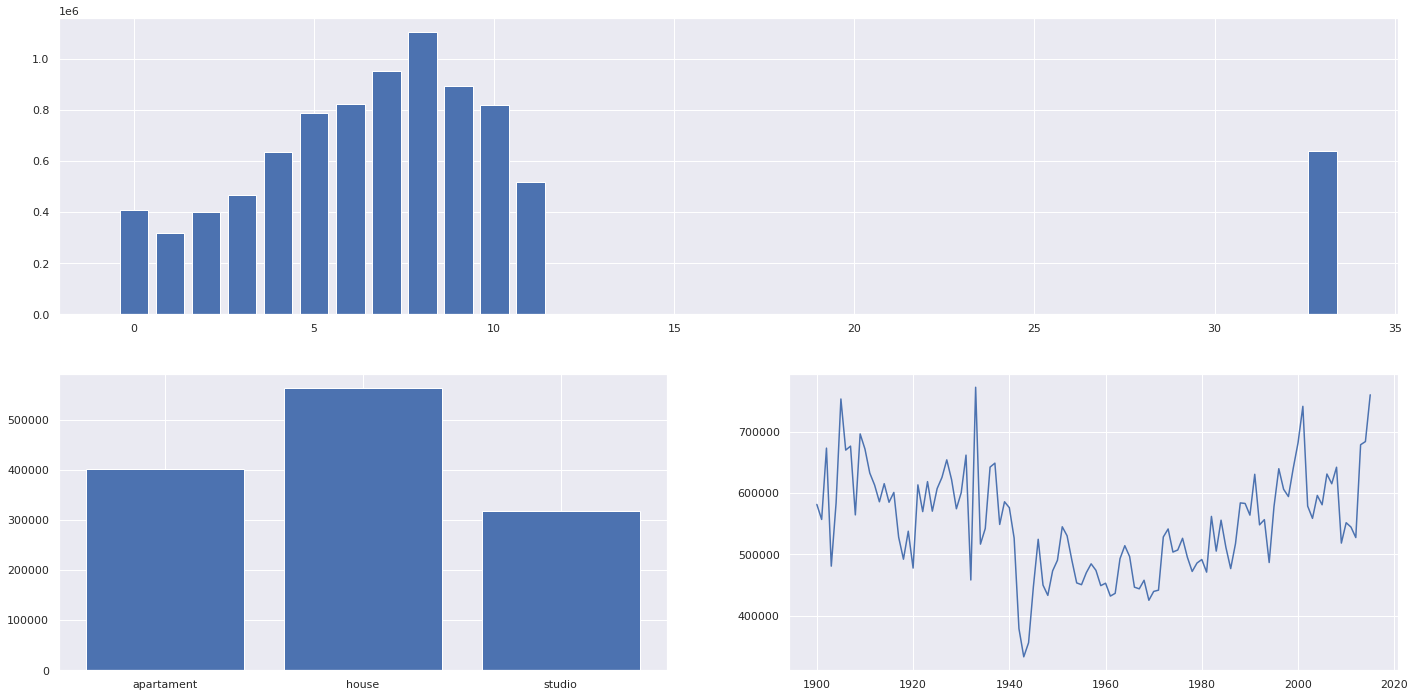

In [103]:
from matplotlib import gridspec
from matplotlib import pyplot as plt

fig = plt.figure( figsize=(24,12))
spec = gridspec.GridSpec( ncols=2 , nrows=2 ,figure=fig)

ax1 = fig.add_subplot( spec[0, :] ) #primeira linha e as 2 colunas
ax2 = fig.add_subplot( spec[1, 0] ) #segunda linha e a primeira coluna
ax3 = fig.add_subplot( spec[1, 1] ) #segunda linha e a segunda coluna


aux = data[['price', 'bedrooms']].groupby( 'bedrooms' ).mean().reset_index()
ax1.bar(aux['bedrooms'], aux['price']);

aux = data[['dormitory_type', 'price']].groupby('dormitory_type').mean().reset_index()
ax2.bar(aux['dormitory_type'], aux['price']);


aux = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
ax3.plot(aux['yr_built'], aux['price']);




## Create a Dashboard with the graphs of questions 02 and 04 (2 columns)

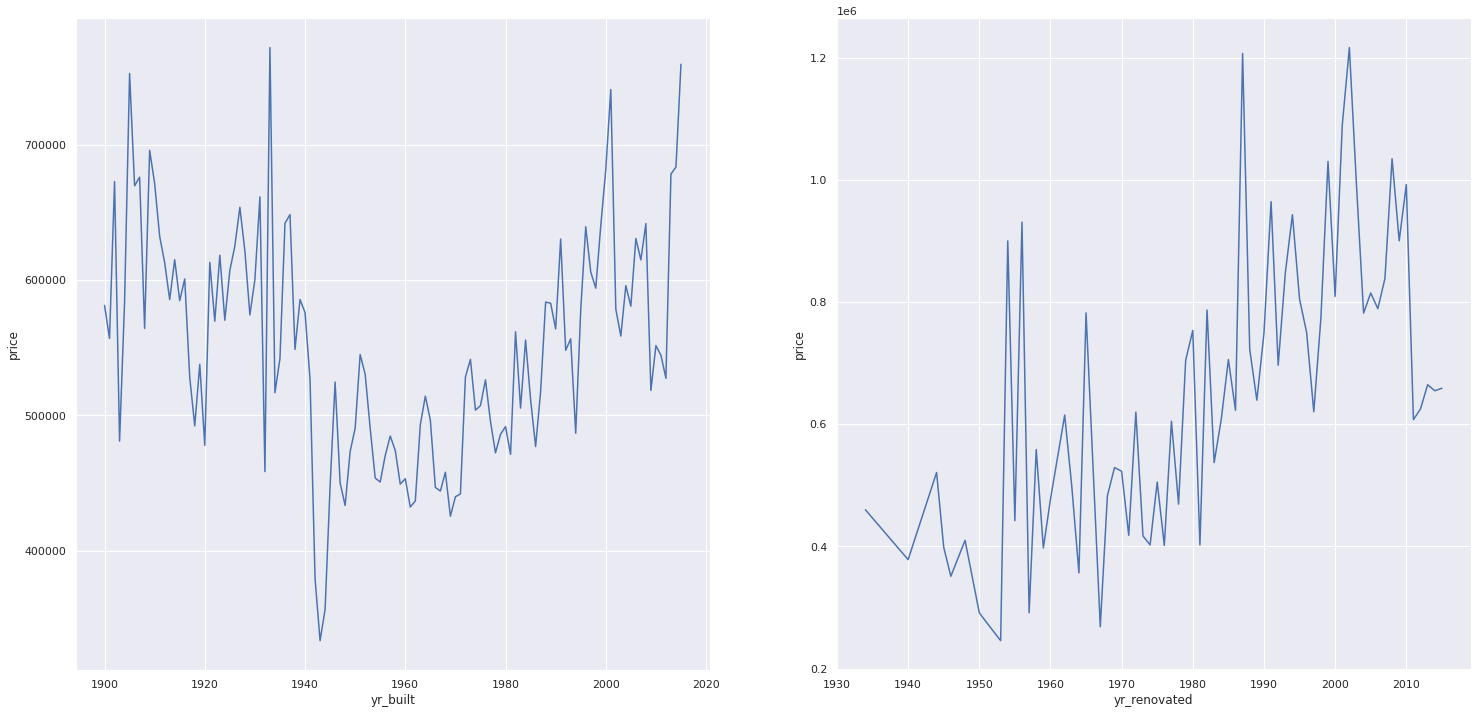

In [106]:
aux = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
plt.subplot(1, 2, 1);
sns.lineplot(x='yr_built', y='price', data=aux);


data['yr_renovated'] = data['yr_renovated'].apply(lambda x: pd.to_datetime('1900-01-01') if x == 0 else pd.to_datetime(x, format='%Y'))

aux = data[['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()
aux = aux[aux['yr_renovated'] > '1930-01-01']
plt.subplot(1, 2, 2);
sns.lineplot(x='yr_renovated', y='price', data=aux);